In [205]:
import pandas as pd 
import numpy as np

year = 2023
dr = 'r'
f = f"rivers_with_locations/rivers_with_location_{year}.csv"
# f = f"ground_l/ground_with_location_{year}.csv"
print
# data = pd.read_csv("ground_l/ground_with_location_2012.csv")
data = pd.read_csv(f)
d_r = pd.read_csv(f)

# # Load your data
# data_file = 'rivers_with_location_2021.csv'
# rivers_data = pd.read_csv(data_file)

# Convert relevant columns to numeric
numeric_columns = ['TEMPERATURE_Min', 'TEMPERATURE_Max', 'DO_Min', 'DO_MAX', 
                   'pH_Min', 'PH_Max', 'CONDUCTIVITY_Min', 'CONDUCTIVITY_Max', 
                   'BOD_Min', 'BOD_Max', 'NITRATE_NITRATE_Min', 'NITRATE_NITRATE_Max',
                   'FECALCOLIFORM_Min', 'FECALCOLIFORM_Max', 'TOTALCOLIFORM_Min', 
                   'TOTALCOLIFORM_Max', 'FLUORIDE_Min', 'FLUORIDE_Max', 'Latitude', 'Longitude']

for col in numeric_columns:
    if col in data.columns:
        data[col] = pd.to_numeric(data[col], errors='coerce')

# Drop rows with missing lat/long
data = data.dropna(subset=['Latitude', 'Longitude'])

data.dtypes

STATION CODE               int64
STATE                     object
TEMPERATURE_Min          float64
TEMPERATURE_Max          float64
DO_Min                   float64
DO_MAX                   float64
pH_Min                   float64
PH_Max                   float64
CONDUCTIVITY_Min         float64
CONDUCTIVITY_Max         float64
BOD_Min                  float64
BOD_Max                  float64
NITRATE_NITRATE_Min      float64
NITRATE_NITRATE_Max      float64
FECALCOLIFORM_Min        float64
FECALCOLIFORM_Max        float64
TOTALCOLIFORM_Min        float64
TOTALCOLIFORM_Max        float64
FecalStreptococci_Min     object
FecalStreptococci_Max     object
Latitude                 float64
Longitude                float64
dtype: object

In [206]:
# data['Temp']=pd.to_numeric(data['Temp'],errors='coerce')
# data['DO_Min']=pd.to_numeric(data['DO_Min'],errors='coerce')
# data['DO_MAX']=pd.to_numeric(data['DO_MAX'],errors='coerce')
# data['BOD_Min']=pd.to_numeric(data['BOD_Min'],errors='coerce')
# data['BOD_Max']=pd.to_numeric(data['BOD_Max'],errors='coerce')
# data['pH_Min']=pd.to_numeric(data['pH_Min'],errors='coerce')
# data['PH_Max']=pd.to_numeric(data['PH_Max'],errors='coerce')
# data['NITRATE_NITRATE_Min']=pd.to_numeric(data['NITRATE_NITRATE_Min'],errors='coerce')
# data['NITRATE_NITRATE_Max']=pd.to_numeric(data['NITRATE_NITRATE_Max'],errors='coerce')
# data['FECALCOLIFORM_Min']=pd.to_numeric(data['FECALCOLIFORM_Min'],errors='coerce')
# data['FECALCOLIFORM_Max']=pd.to_numeric(data['FECALCOLIFORM_Max'],errors='coerce')
# data['TOTALCOLIFORM_Min']=pd.to_numeric(data['TOTALCOLIFORM_Min'],errors='coerce')
# data['TOTALCOLIFORM_Max']=pd.to_numeric(data['TOTALCOLIFORM_Max'],errors='coerce')
# data['FLUORIDE_Min']=pd.to_numeric(data['FLUORIDE_Min'],errors='coerce')
# data['FLUORIDE_Max']=pd.to_numeric(data['FLUORIDE_Max'],errors='coerce')
data.dtypes

STATION CODE               int64
STATE                     object
TEMPERATURE_Min          float64
TEMPERATURE_Max          float64
DO_Min                   float64
DO_MAX                   float64
pH_Min                   float64
PH_Max                   float64
CONDUCTIVITY_Min         float64
CONDUCTIVITY_Max         float64
BOD_Min                  float64
BOD_Max                  float64
NITRATE_NITRATE_Min      float64
NITRATE_NITRATE_Max      float64
FECALCOLIFORM_Min        float64
FECALCOLIFORM_Max        float64
TOTALCOLIFORM_Min        float64
TOTALCOLIFORM_Max        float64
FecalStreptococci_Min     object
FecalStreptococci_Max     object
Latitude                 float64
Longitude                float64
dtype: object

In [207]:
len = data.shape[0]
start = 0
end = len
station = data.iloc[start:end ,0]
# location = data.iloc[start:end ,1]
# state = data.iloc[start:end ,2]
do_min = data.iloc[start:end ,4].astype(np.float64)
do_max = data.iloc[start:end ,5].astype(np.float64)
# value = 0
ph_min = data.iloc[start:end, 6]  
ph_max = data.iloc[start:end, 7]  

bod_min = data.iloc[start:end, 10].astype(np.float64)
bod_max = data.iloc[start:end, 11].astype(np.float64)

nn_min = data.iloc[start:end ,12].astype(np.float64)
nn_max = data.iloc[start:end ,13].astype(np.float64)

fc_min = data.iloc[start:end, 14].astype(np.float64)
fc_max = data.iloc[start:end, 15].astype(np.float64)

tc_min = data.iloc[start:end, 16].astype(np.float64)
tc_max = data.iloc[start:end, 17].astype(np.float64)

# fl_min = data.iloc[start:end, 18].astype(np.float64)
# fl_max = data.iloc[start:end, 19].astype(np.float64)

ph_min
do = do_min
pH = ph_min.copy()  # start with ph_min
pH[(ph_min > 6.5) & (ph_min < 8.5)] = ph_max[(ph_min > 6.5) & (ph_min < 8.5)]

# pH = []
# for i in range(len(ph_min)):
# 	if ph_min[i] < 6.5:
# 		pH.append(ph_min[i])
# 	elif ph_min[i] > 8.5:
# 		pH.append(ph_min[i])
# 	else:
# 		pH.append(ph_max[i])
bod = bod_max
nn = nn_max
fc = fc_max
tc = tc_max

# data.head()

In [208]:
data = pd.concat([station, do, pH, bod, nn, fc, tc],axis=1)
data.columns = ['STATION CODE','do','pH','bod','nn','fc','tc']
data.head()

,STATION CODE,do,pH,bod,nn,fc,tc
0,1001,7.8,8.2,2.8,1.15,170.0,540.0
1,2601,7.6,6.5,2.8,1.87,1600.0,1600.0
2,4444,7.8,7.8,2.8,1.08,1600.0,1600.0
3,4037,7.9,6.3,1.0,1.74,110.0,540.0
4,3866,7.8,7.8,1.0,0.97,120.0,430.0


In [209]:
def normalize_pH(x):
	if 7 <= x <= 8:
		return 100
	elif 6.5 <= x < 7 or 8 < x <= 8.5:
		return 95
	# elif 6.1 <= x < 6.5 or 8.5 < x <= 8.9:
	# 	return 65
	# elif 5.8 <= x < 6.1 or 8.9 < x <= 9.2:
	# 	return 50
	# elif 5.5 <= x < 5.8 or 9.2 < x <= 9.5:
	# 	return 40
	# elif 5.0 <= x < 5.5 or 9.5 < x <= 10:
	# 	return 30
	# elif 4.0 <= x < 5.0 or 10 < x <= 11:
	# 	return 20
	else:
		return 0 
	
def normalize_DO(x):
	if x >= 6:
		return 100
	elif 5.1 <= x < 6:
		return 95
	elif 4.1 <= x < 5.1:
		return 60
	elif 3 <= x < 4.1:
		return 40
	elif 2 <= x < 3:
		return 20
	else:
		return 0
	
def normalize_BOD(x):
	if 0 <= x <= 3:
		return 100
	elif 3 < x <= 6:
		return 80
	elif 6 < x <= 10:
		return 60
	elif 10 < x <= 20:
		return 40
	elif 20 < x <= 40:
		return 20
	else:
		return 0

def normalize_TC(x):
	if x <= 500:
		return 100
	elif x <= 700:
		return 80
	elif x <= 1500:
		return 60
	elif x <= 2500:
		return 40
	elif x <= 6000:
		return 20
	else:
		return 0

def normalize_FC(x):
	if x <= 500:
		return 100
	elif x <= 1000:
		return 90
	elif x <= 1500:
		return 80
	elif x <= 2000:
		return 70
	elif x <= 2500:
		return 60
	elif x <= 5000:
		return 40
	elif x <= 6000:
		return 20
	elif x <= 8000:
		return 10
	else:
		return 0

def normalize_NN(x):
	if 0 <= x <= 10:
		return 100
	elif x <= 45:
		return 90
	# elif x <= 100:
	# 	return 60
	# elif x <= 200:
	# 	return 40
	# elif x <= 400:
	# 	return 20
	else:
		return 0
	
def normalize_F(x):
	if 0 <= x <= 1:
		return 100
	elif x <= 1.5:
		return 80
	# elif x <= 100:
	# 	return 60
	# elif x <= 200:
	# 	return 40
	# elif x <= 400:
	# 	return 20
	else:
		return 0


data['npH'] = data.pH.apply(normalize_pH)
data['ndo'] = data.do.apply(normalize_DO)
data['nbod'] = data.bod.apply(normalize_BOD)
data['ntc'] = data.tc.apply(normalize_TC)
data['nfc'] = data.fc.apply(normalize_FC)
data['nnn'] = data.nn.apply(normalize_NN)
data['nf'] = data.fc.apply(normalize_F)

data.head()
# data.dtypes

,STATION CODE,do,pH,bod,nn,fc,tc,npH,ndo,nbod,ntc,nfc,nnn,nf
0,1001,7.8,8.2,2.8,1.15,170.0,540.0,95,100,100,80,100,100,0
1,2601,7.6,6.5,2.8,1.87,1600.0,1600.0,95,100,100,40,70,100,0
2,4444,7.8,7.8,2.8,1.08,1600.0,1600.0,100,100,100,40,70,100,0
3,4037,7.9,6.3,1.0,1.74,110.0,540.0,0,100,100,80,100,100,0
4,3866,7.8,7.8,1.0,0.97,120.0,430.0,100,100,100,100,100,100,0


In [210]:
def calculate_wqi_with_nulls(data, norm_cols, weight_cols, new_col_name='wqi'):
    # Count nulls in normalized columns
    data['null_count'] = data[norm_cols].isnull().sum(axis=1)
    
    # Apply WQI formula row-wise only when <3 nulls
    def compute(row):
        if row['null_count'] >= 3:
            return np.nan
        valid_weights = [w for val, w in zip(row[norm_cols], row[weight_cols]) if not pd.isnull(val)]
        valid_values = [val for val in row[norm_cols] if not pd.isnull(val)]
        if not valid_weights or not valid_values:
            return np.nan
        return round(np.average(valid_values, weights=valid_weights), 1)
    
    data[new_col_name] = data.apply(compute, axis=1)
    data.drop(columns=['null_count'], inplace=True)
    return data

# data['wpH'] = data.npH * 0.15
# data['wdo'] = data.ndo * 0.26
# data['wbod'] = data.nbod * 0.22
# data['wtc'] = data.ntc * 0.20
# # data['wnn'] = data.nnn * 0.028
# data['wfc'] = data.nfc * 0.17
if dr == 'r':
	data['wpH'] = 0.15
	data['wdo'] = 0.26
	data['wbod'] = 0.22
	data['wtc'] = 0.20
	data['wfc'] = 0.17
	norm_cols_river = ['npH', 'ndo', 'nbod', 'nfc', 'ntc']
	weight_cols_river = ['wpH', 'wdo', 'wbod', 'wfc', 'wtc']

	data = calculate_wqi_with_nulls(data, norm_cols_river, weight_cols_river, new_col_name='wqi')

	# data['wqi'] = data.wpH + data.wdo + data.wbod + data.wtc + data.wfc 

elif dr == 'g':
	data['wpH'] = data.npH * 0.15
	data['wtc'] = data.ntc * 0.20
	data['wnn'] = data.nnn * 0.028
	data['wfc'] = data.nfc * 0.17
	data['wf'] = data.nf * 0.22
	# data['wqi'] = data.wpH + data.wtc + data.wfc + data.wnn + data.wf
	norm_cols_river = ['npH', 'nfc', 'ntc', 'nnn', 'nf']
	weight_cols_river = ['wpH', 'wfc', 'wtc', 'wnn', 'wf']

	data = calculate_wqi_with_nulls(data, norm_cols_river, weight_cols_river, new_col_name='wqi')

elif dr == 's':
	data['wpH'] = data.npH * 0.15
	data['wdo'] = data.ndo * 0.26
	data['wbod'] = data.nbod * 0.22
	data['wtc'] = data.ntc * 0.20
	# data['wnn'] = data.nnn * 0.028
	data['wfc'] = data.nfc * 0.17
	data['wqi'] = data.wpH + data.wdo + data.wbod + data.wtc + data.wfc + data.wnn

data

,STATION CODE,do,pH,bod,nn,fc,tc,npH,ndo,nbod,ntc,nfc,nnn,nf,wpH,wdo,wbod,wtc,wfc,wqi
0,1001,7.8,8.2,2.8,1.15,170.0,540.0,95,100,100,80,100,100,0,0.15,0.26,0.22,0.2,0.17,95.2
1,2601,7.6,6.5,2.8,1.87,1600.0,1600.0,95,100,100,40,70,100,0,0.15,0.26,0.22,0.2,0.17,82.2
2,4444,7.8,7.8,2.8,1.08,1600.0,1600.0,100,100,100,40,70,100,0,0.15,0.26,0.22,0.2,0.17,82.9
3,4037,7.9,6.3,1.0,1.74,110.0,540.0,0,100,100,80,100,100,0,0.15,0.26,0.22,0.2,0.17,81.0
4,3866,7.8,7.8,1.0,0.97,120.0,430.0,100,100,100,100,100,100,0,0.15,0.26,0.22,0.2,0.17,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1614,3943,5.6,8.5,2.4,0.86,2300.0,4900.0,95,95,100,20,60,100,0,0.15,0.26,0.22,0.2,0.17,75.2
1615,3942,3.2,8.5,1.8,0.93,13000.0,35000.0,95,40,100,0,0,100,0,0.15,0.26,0.22,0.2,0.17,46.6
1616,2115,6.6,8.6,1.8,1.42,2.0,63.0,0,100,100,100,100,100,0,0.15,0.26,0.22,0.2,0.17,85.0
1617,4753,2.9,6.5,11.7,0.00,NaN,NaN,95,20,40,0,0,100,0,0.15,0.26,0.22,0.2,0.17,28.2


In [211]:
wqi_data = data[['STATION CODE', 'wqi']]

# Merge on STATION CODE code
updated_df = d_r.merge(wqi_data, on='STATION CODE', how='left')

# Save to a new CSV or overwrite existing
updated_df.to_csv(f'rlwqi/r_l_wqi_{year}.csv', index=False)

Loading and combining data from all years...
Loaded data for year 2012 - 981 records
Loaded data for year 2013 - 709 records
Loaded data for year 2014 - 717 records
Loaded data for year 2015 - 783 records
Loaded data for year 2016 - 865 records
Loaded data for year 2017 - 947 records
Loaded data for year 2018 - 1026 records
Loaded data for year 2019 - 1090 records
Loaded data for year 2020 - 889 records
Loaded data for year 2021 - 1536 records
Loaded data for year 2022 - 1597 records
Loaded data for year 2023 - 1629 records
Combined data shape: (12769, 25)
Preparing and cleaning data...
Prepared data shape: (12611, 14)
Analyzing data...

Data Summary:
       STATION CODE      Latitude     Longitude          YEAR           wqi  \
count  12611.000000  12611.000000  12611.000000  12611.000000  12611.000000   
mean    3232.887796     23.578807     80.881855   2018.315756     61.131901   
std     4476.367743      5.612249      5.794407      3.517788     27.236155   
min        1.000000     

ValueError: Grouper for 'STATION CODE' not 1-dimensional

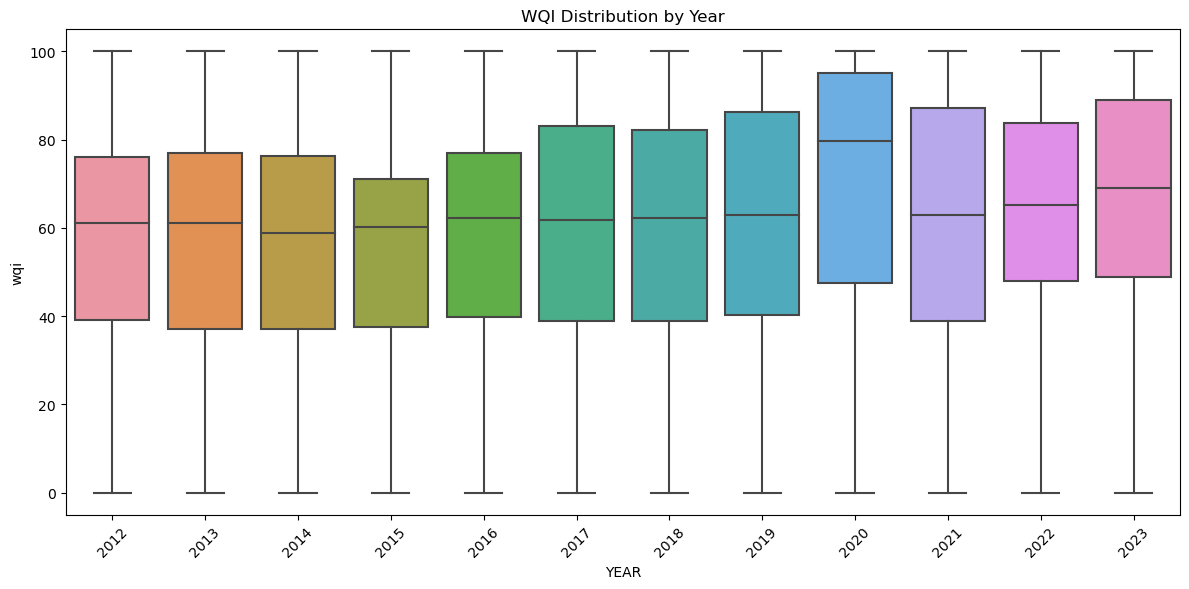

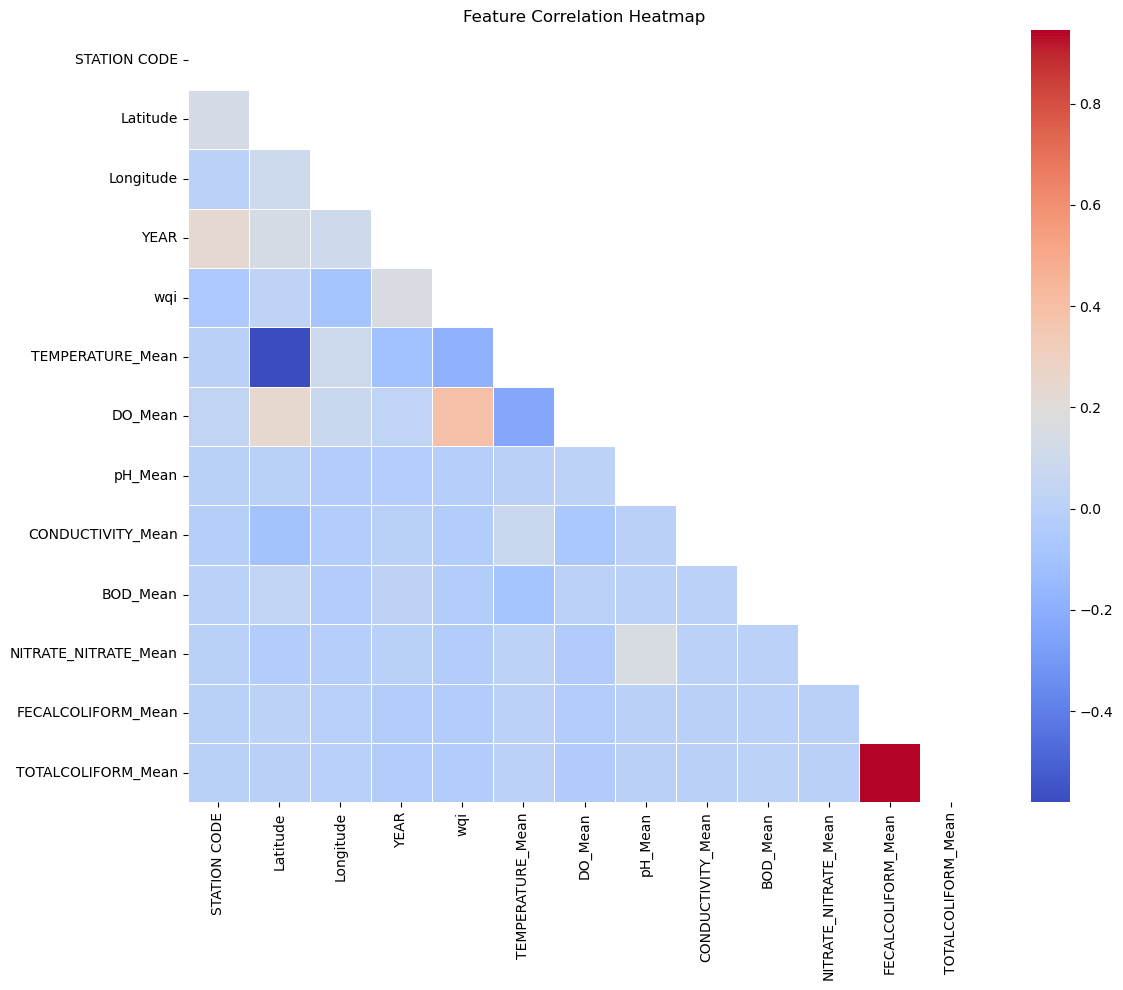

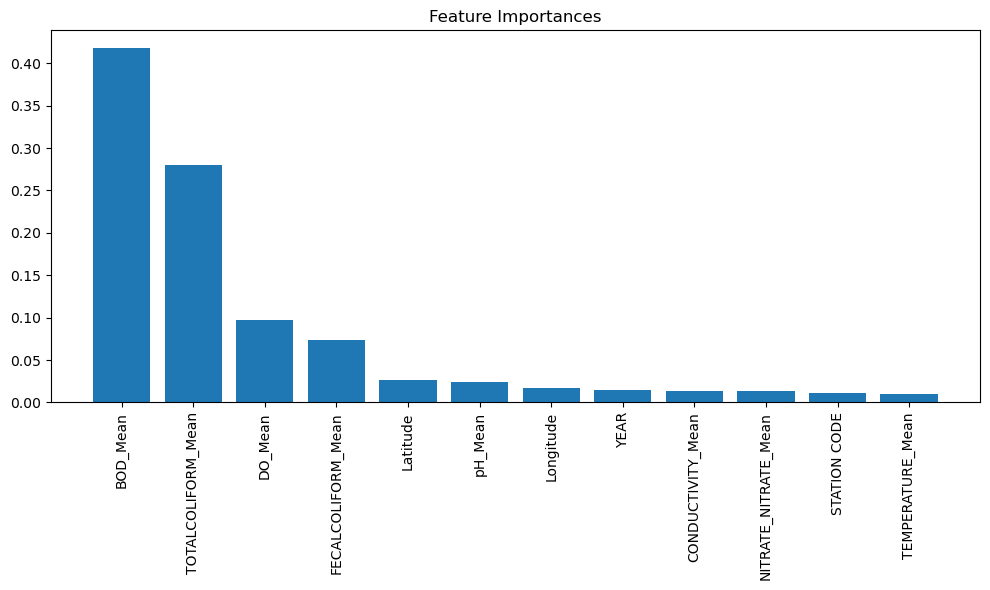

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline
import joblib

# Configuration
data_folder = 'rlwqi'
file_pattern = 'r_l_wqi_{}.csv'
years = range(2012, 2024)  # 2012 to 2023
output_model_file = 'wqi_prediction_model.pkl'
forecast_years = [2024, 2025, 2026]  # Years to predict

# Function to load and combine all yearly data
def load_combined_data(folder, file_pattern, years):
    all_data = []
    
    for year in years:
        file_path = os.path.join(folder, file_pattern.format(year))
        try:
            df = pd.read_csv(file_path)
            # Add year column
            df['YEAR'] = year
            all_data.append(df)
            print(f"Loaded data for year {year} - {df.shape[0]} records")
        except Exception as e:
            print(f"Error loading file for year {year}: {e}")
    
    if not all_data:
        raise ValueError("No data was loaded!")
    
    # Combine all years into a single dataframe
    combined_data = pd.concat(all_data, ignore_index=True)
    return combined_data

# Load all data from 2012-2023
print("Loading and combining data from all years...")
combined_data = load_combined_data(data_folder, file_pattern, years)
print(f"Combined data shape: {combined_data.shape}")

# Data Preparation and Cleaning
def prepare_data(df):
    # Convert columns to numeric
    numeric_columns = [
        'TEMPERATURE_Min', 'TEMPERATURE_Max', 'DO_Min', 'DO_MAX', 
        'pH_Min', 'PH_Max', 'CONDUCTIVITY_Min', 'CONDUCTIVITY_Max', 
        'BOD_Min', 'BOD_Max', 'NITRATE_NITRATE_Min', 'NITRATE_NITRATE_Max',
        'FECALCOLIFORM_Min', 'FECALCOLIFORM_Max', 'TOTALCOLIFORM_Min', 
        'TOTALCOLIFORM_Max', 'Latitude', 'Longitude', 'wqi'
    ]
    
    for col in numeric_columns:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # Feature engineering
    # Create mean values for paired min/max columns
    paired_columns = [
        ('TEMPERATURE_Min', 'TEMPERATURE_Max', 'TEMPERATURE_Mean'),
        ('DO_Min', 'DO_MAX', 'DO_Mean'),
        ('pH_Min', 'PH_Max', 'pH_Mean'),
        ('CONDUCTIVITY_Min', 'CONDUCTIVITY_Max', 'CONDUCTIVITY_Mean'),
        ('BOD_Min', 'BOD_Max', 'BOD_Mean'),
        ('NITRATE_NITRATE_Min', 'NITRATE_NITRATE_Max', 'NITRATE_NITRATE_Mean'),
        ('FECALCOLIFORM_Min', 'FECALCOLIFORM_Max', 'FECALCOLIFORM_Mean'),
        ('TOTALCOLIFORM_Min', 'TOTALCOLIFORM_Max', 'TOTALCOLIFORM_Mean')
    ]
    
    for min_col, max_col, mean_col in paired_columns:
        if min_col in df.columns and max_col in df.columns:
            df[mean_col] = df[[min_col, max_col]].mean(axis=1)
    
    # Keep only required columns and drop rows with missing wqi
    keep_columns = ['STATION CODE', 'STATE', 'Latitude', 'Longitude', 'YEAR', 'wqi']
    for _, _, mean_col in paired_columns:
        keep_columns.append(mean_col)
    
    # Keep only columns that exist in the dataframe
    keep_columns = [col for col in keep_columns if col in df.columns]
    
    df_cleaned = df[keep_columns].copy()
    df_cleaned.dropna(subset=['wqi'], inplace=True)
    
    return df_cleaned

# Prepare the data
print("Preparing and cleaning data...")
prepared_data = prepare_data(combined_data)
print(f"Prepared data shape: {prepared_data.shape}")

# Fill any remaining NaN values with column medians
prepared_data = prepared_data.fillna(prepared_data.median(numeric_only=True))

# Analyze data
def analyze_data(df):
    # Statistical summary
    print("\nData Summary:")
    print(df.describe())
    
    # Select only numeric columns for correlation analysis
    numeric_df = df.select_dtypes(include=[np.number])
    
    # Correlation with WQI
    print("\nCorrelation with WQI:")
    if 'wqi' in numeric_df.columns:
        correlations = numeric_df.corr()['wqi'].sort_values(ascending=False)
        print(correlations)
    else:
        print("WQI column not found in numeric data")
        correlations = pd.Series()
    
    # Plot WQI distribution by year
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='YEAR', y='wqi', data=df)
    plt.title('WQI Distribution by Year')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('wqi_by_year.png')
    
    # Plot correlation heatmap
    plt.figure(figsize=(12, 10))
    corr_matrix = numeric_df.corr()
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.heatmap(corr_matrix, mask=mask, annot=False, cmap='coolwarm', linewidths=0.5)
    plt.title('Feature Correlation Heatmap')
    plt.tight_layout()
    plt.savefig('correlation_heatmap.png')
    
    return correlations

# Analyze the prepared data
print("Analyzing data...")
correlations = analyze_data(prepared_data)

# Prepare features and target for ML
def prepare_ml_data(df):
    # Keep only numeric columns for features
    numeric_df = df.select_dtypes(include=[np.number])
    
    # Drop wqi from features but include YEAR
    feature_cols = [col for col in numeric_df.columns if col != 'wqi']
    
    # Create dummy variables for categorical columns if needed
    categorical_cols = ['STATE']
    for col in categorical_cols:
        if col in df.columns:
            dummies = pd.get_dummies(df[col], prefix=col, drop_first=True)
            # Combine with numeric features
            for dummy_col in dummies.columns:
                numeric_df[dummy_col] = dummies[dummy_col]
    
    X = numeric_df[feature_cols]
    y = df['wqi']
    
    # Split data for training and testing
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    print(f"Features used: {X.columns.tolist()}")
    print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")
    
    return X, y, X_train, X_test, y_train, y_test, feature_cols

# Prepare ML data
print("Preparing data for machine learning...")
X, y, X_train, X_test, y_train, y_test, feature_cols = prepare_ml_data(prepared_data)

# Train and evaluate models
def train_evaluate_models(X_train, X_test, y_train, y_test):
    models = {
        'Linear Regression': LinearRegression(),
        'Random Forest': RandomForestRegressor(random_state=42),
        'Gradient Boosting': GradientBoostingRegressor(random_state=42)
    }
    
    results = {}
    best_model = None
    best_score = float('-inf')
    
    for name, model in models.items():
        print(f"\nTraining {name}...")
        
        # Create a pipeline with scaling
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('model', model)
        ])
        
        # Train the model
        pipeline.fit(X_train, y_train)
        
        # Make predictions
        y_pred = pipeline.predict(X_test)
        
        # Evaluate
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        
        print(f"{name} - RMSE: {rmse:.2f}, R²: {r2:.4f}, MAE: {mae:.2f}")
        
        results[name] = {
            'pipeline': pipeline,
            'rmse': rmse,
            'r2': r2,
            'mae': mae
        }
        
        # Track best model
        if r2 > best_score:
            best_score = r2
            best_model = pipeline
    
    return results, best_model

# Train and evaluate models
print("Training and evaluating models...")
model_results, best_model = train_evaluate_models(X_train, X_test, y_train, y_test)

# Fine-tune the best model (if it's Random Forest or Gradient Boosting)
def fine_tune_model(X_train, y_train, X_test, y_test):
    # Assuming Random Forest performed well
    param_grid = {
        'model__n_estimators': [100, 200, 300],
        'model__max_depth': [None, 10, 20, 30],
        'model__min_samples_split': [2, 5, 10]
    }
    
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', RandomForestRegressor(random_state=42))
    ])
    
    grid_search = GridSearchCV(
        pipeline, param_grid, cv=5, 
        scoring='neg_mean_squared_error',
        n_jobs=-1
    )
    
    print("Fine-tuning Random Forest model...")
    grid_search.fit(X_train, y_train)
    
    print(f"Best parameters: {grid_search.best_params_}")
    best_pipeline = grid_search.best_estimator_
    
    # Evaluate the fine-tuned model
    y_pred = best_pipeline.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    print(f"Fine-tuned model - RMSE: {rmse:.2f}, R²: {r2:.4f}, MAE: {mae:.2f}")
    
    return best_pipeline

# Fine-tune the model
print("Fine-tuning the best model...")
fine_tuned_model = fine_tune_model(X_train, y_train, X_test, y_test)

# Feature importance analysis
def analyze_feature_importance(model, feature_names):
    # Extract the model from the pipeline
    estimator = model.named_steps['model']
    
    if hasattr(estimator, 'feature_importances_'):
        importances = estimator.feature_importances_
        indices = np.argsort(importances)[::-1]
        
        plt.figure(figsize=(10, 6))
        plt.title('Feature Importances')
        plt.bar(range(len(importances)), importances[indices])
        plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
        plt.tight_layout()
        plt.savefig('feature_importances.png')
        
        print("\nFeature Importances:")
        for i in indices:
            print(f"{feature_names[i]}: {importances[i]:.4f}")

# Analyze feature importance
print("Analyzing feature importance...")
analyze_feature_importance(fine_tuned_model, X.columns.tolist())

# Save the model
print(f"Saving the model to {output_model_file}...")
joblib.dump(fine_tuned_model, output_model_file)

# Function to create station profiles for prediction
def create_station_profiles(df):
    # Select only numeric columns and 'STATION CODE'
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    
    # Make sure 'STATION CODE' is included
    profile_cols = ['STATION CODE'] + [col for col in numeric_cols if col != 'wqi' and col != 'YEAR']
    profile_data = df[profile_cols].copy()
    
    # Group by station code and calculate the mean of all numeric columns
    station_profiles = profile_data.groupby('STATION CODE').mean().reset_index()
    
    # If STATE is needed, add most common STATE for each station
    if 'STATE' in df.columns:
        state_mode = df.groupby('STATION CODE')['STATE'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
        station_profiles = station_profiles.merge(state_mode.reset_index(), on='STATION CODE')
    
    return station_profiles

# Create station profiles
print("Creating station profiles for prediction...")
station_profiles = create_station_profiles(prepared_data)

# Function to predict WQI for future years
def predict_future_wqi(model, station_profiles, future_years, feature_cols):
    predictions = []
    
    for year in future_years:
        print(f"Predicting WQI for year {year}...")
        
        # Create a copy of station profiles for this year
        year_data = station_profiles.copy()
        year_data['YEAR'] = year
        
        # Make sure all feature columns exist in year_data
        for col in feature_cols:
            if col not in year_data.columns:
                # If a feature is missing, fill with zeros
                # (alternatively, you could use mean values from the training data)
                year_data[col] = 0
        
        # Select only the features used in training
        pred_features = year_data[feature_cols].copy()
        
        # Predict WQI
        year_data['predicted_wqi'] = model.predict(pred_features)
        
        # Add year information
        year_data['prediction_year'] = year
        
        # Keep only necessary columns for output
        output_cols = ['STATION CODE', 'prediction_year', 'predicted_wqi']
        
        # Add lat/long if available
        if 'Latitude' in year_data.columns and 'Longitude' in year_data.columns:
            output_cols.extend(['Latitude', 'Longitude'])
            
        # Add STATE if available
        if 'STATE' in year_data.columns:
            output_cols.append('STATE')
            
        result_df = year_data[output_cols]
        
        predictions.append(result_df)
        
        # Save the predictions to CSV
        output_file = f'predicted_wqi_{year}.csv'
        result_df.to_csv(output_file, index=False)
        print(f"Saved predictions to {output_file}")
    
    # Combine all predictions
    all_predictions = pd.concat(predictions, ignore_index=True)
    return all_predictions

# Predict WQI for future years
print(f"Predicting WQI for years {forecast_years}...")
future_predictions = predict_future_wqi(
    fine_tuned_model, station_profiles, forecast_years, feature_cols
)

# Visualize predictions
def visualize_predictions(historical_data, future_predictions):
    # Calculate mean WQI by year for historical data
    historical_mean = historical_data.groupby('YEAR')['wqi'].mean().reset_index()
    historical_std = historical_data.groupby('YEAR')['wqi'].std().reset_index()
    
    # Calculate mean predicted WQI by year for future data
    future_mean = future_predictions.groupby('prediction_year')['predicted_wqi'].mean().reset_index()
    future_mean = future_mean.rename(columns={'prediction_year': 'YEAR', 'predicted_wqi': 'wqi'})
    
    # Combine historical and future
    all_years = pd.concat([historical_mean, future_mean], ignore_index=True)
    
    # Plot
    plt.figure(figsize=(12, 6))
    
    # Historical data with error band
    plt.plot(historical_mean['YEAR'], historical_mean['wqi'], 
             marker='o', color='blue', label='Historical WQI')
    
    plt.fill_between(
        historical_mean['YEAR'], 
        historical_mean['wqi'] - historical_std['wqi'],
        historical_mean['wqi'] + historical_std['wqi'],
        alpha=0.2, color='blue'
    )
    
    # Future predictions
    plt.plot(future_mean['YEAR'], future_mean['wqi'], 
             marker='s', color='red', linestyle='--', label='Predicted WQI')
    
    plt.title('WQI Trends and Predictions')
    plt.xlabel('Year')
    plt.ylabel('Mean WQI')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.tight_layout()
    plt.savefig('wqi_predictions.png')
    
    print("\nWQI Prediction Summary:")
    for year in forecast_years:
        year_pred = future_predictions[future_predictions['prediction_year'] == year]
        mean_wqi = year_pred['predicted_wqi'].mean()
        print(f"Year {year} - Predicted Mean WQI: {mean_wqi:.2f}")

# Visualize the predictions
print("Visualizing predictions...")
visualize_predictions(prepared_data, future_predictions)

print("\nWQI prediction completed successfully!")